## Why Did I Choose ICA for `new_arrayA` and PCA for `new_arrayB`?

At first step, I **did not know** which method would work better for two different dataset. So, I decided to try both of them on my dataset and see the results.  



- When I applied **ICA to `new_arrayA`**, the output looked almost **good**, but the much better result gained when I tryed PCA on this dataset.

- When I implemented **PCA to `new_arrayB`**, the result was **not good** and the extracted components were not meaningful. This suggested that the dataset did not have strong patterns based on variance.To fix this, I switched the method to ICA.



# Apply ICA on new_arrayA and PCA on new_arrayB

/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


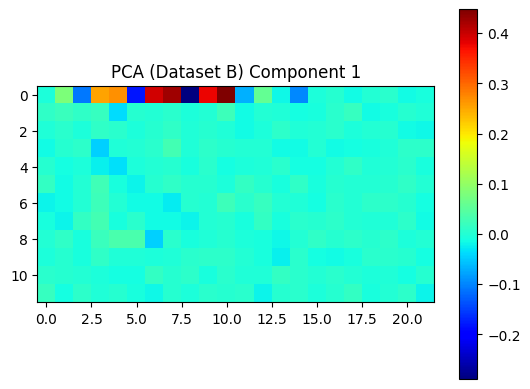

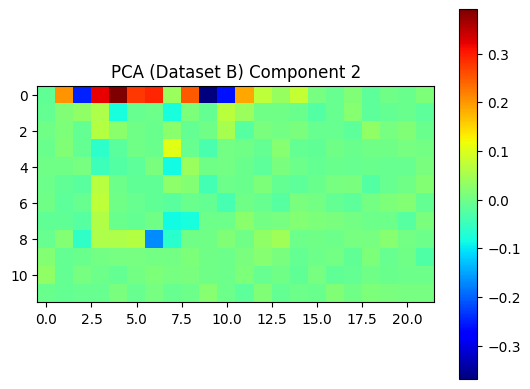

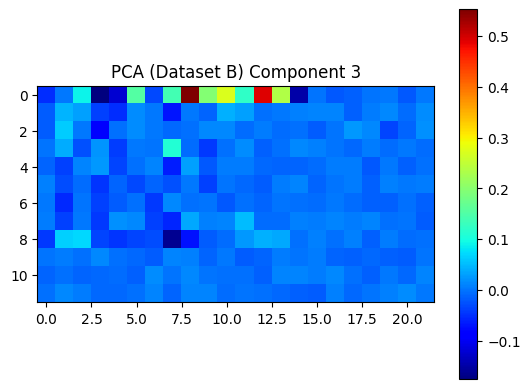

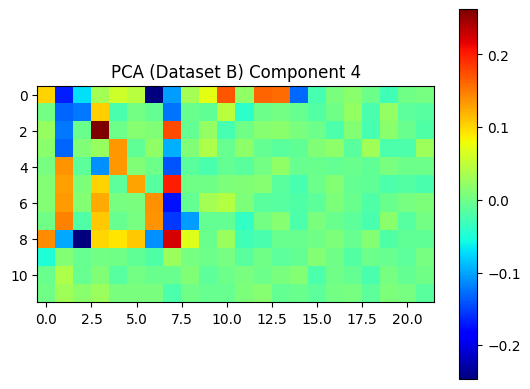

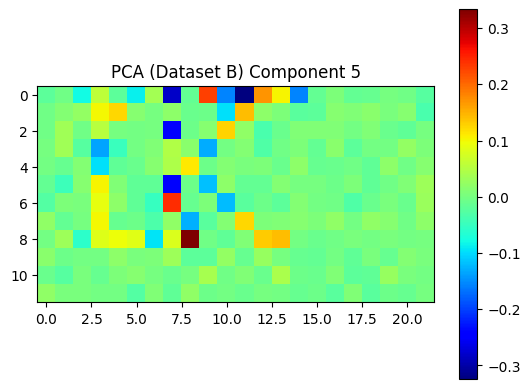

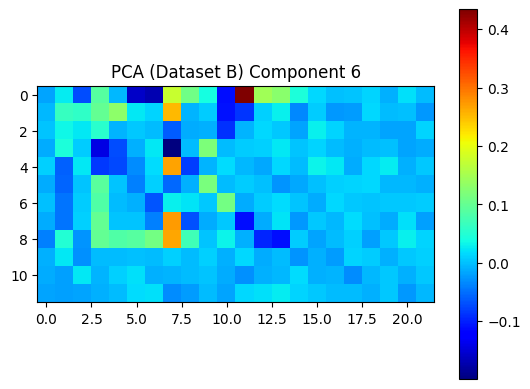

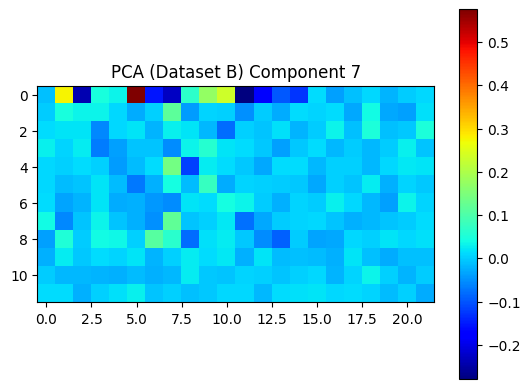

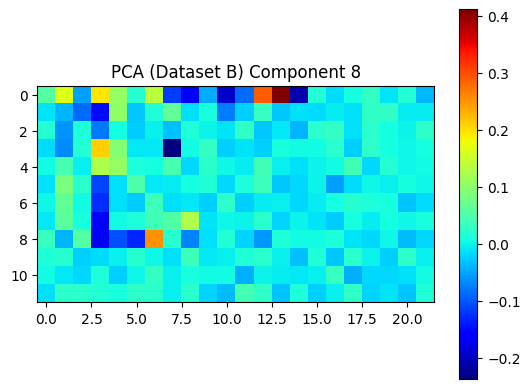

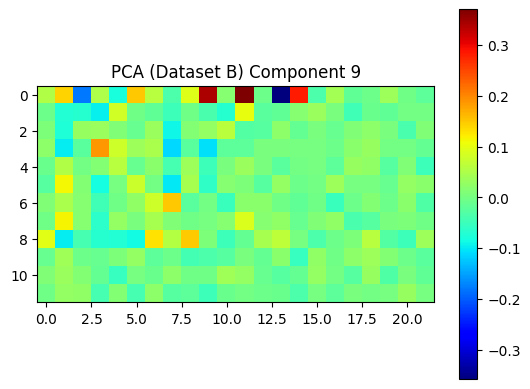

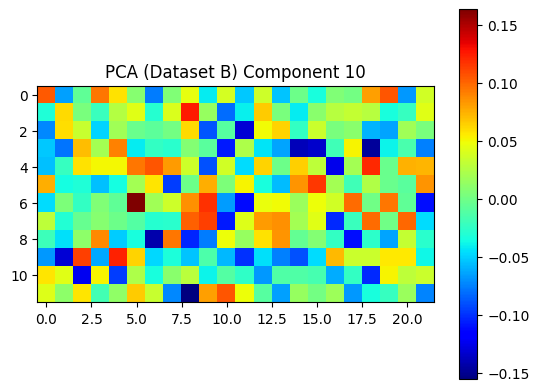

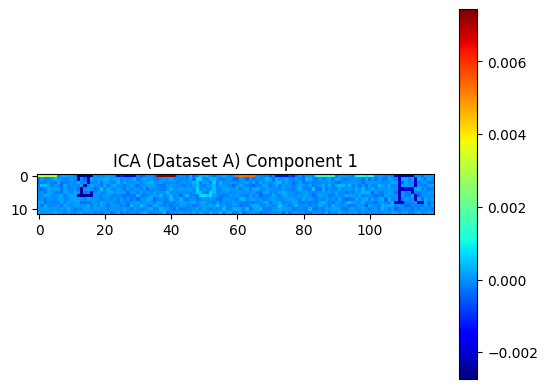

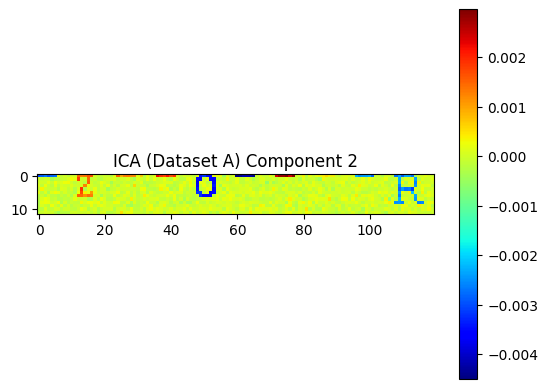

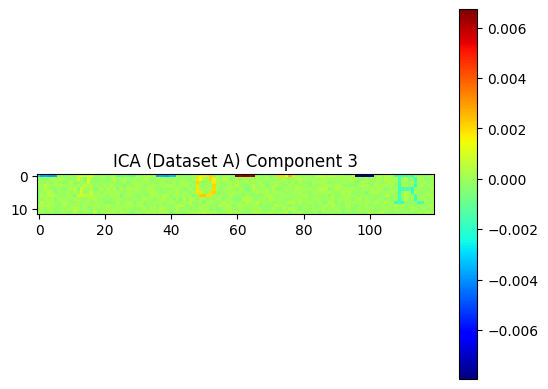

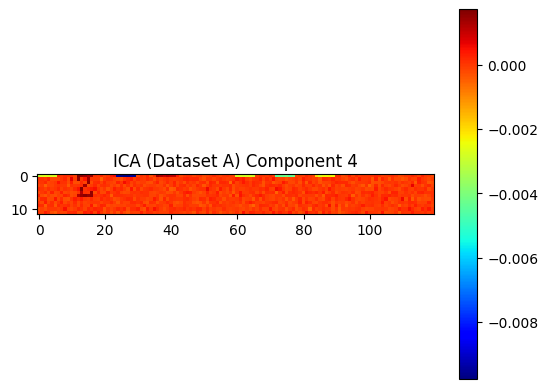

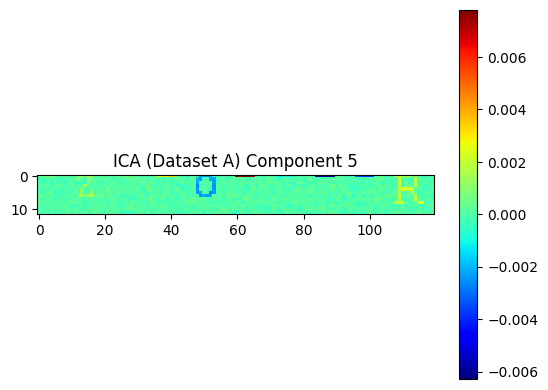

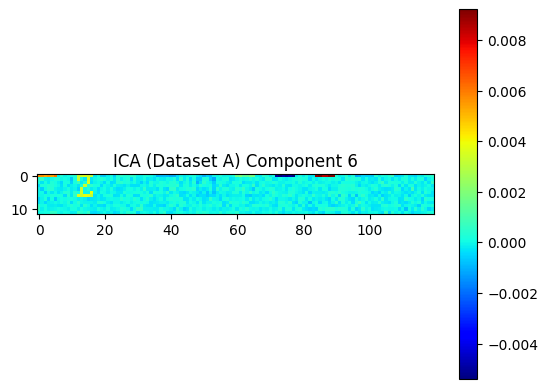

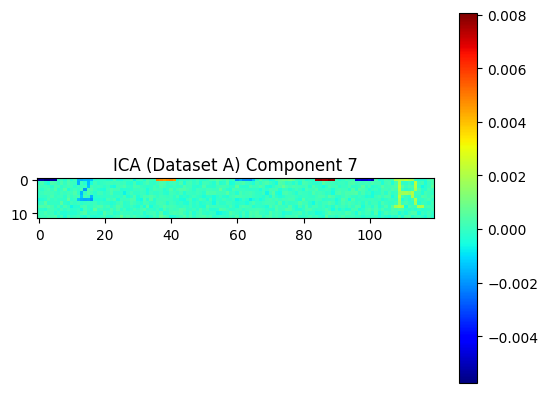

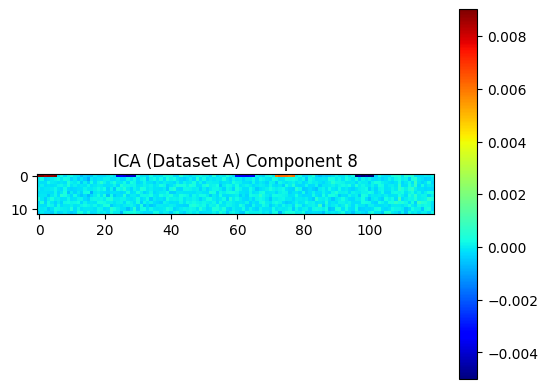

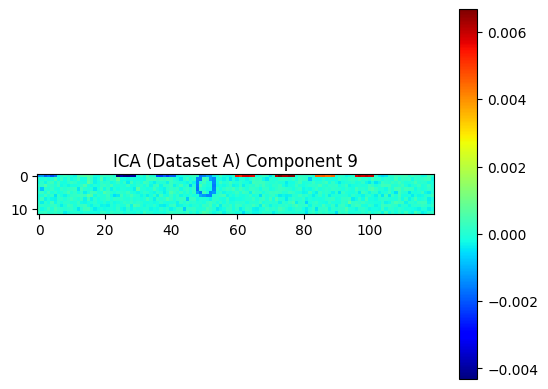

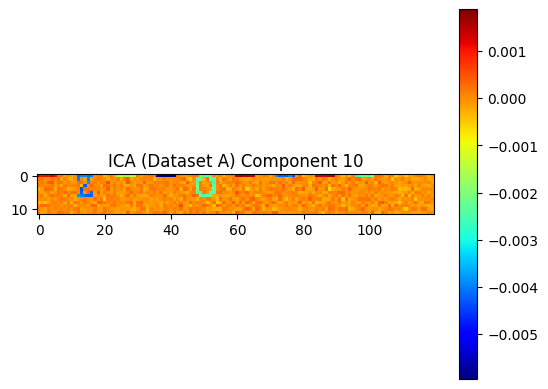

In [1]:
import numpy as np
from tables import open_file
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

# Define the file path
ADDRESS = "/Users/minaghaderi/Downloads/OneDrive_1_1-24-2025/"

# Function to load HDF5 file and extract dataset
def load_hdf5_file(filename):
    file = open_file(ADDRESS + filename, mode="r")
    return file.root.Images.Images  # Assuming structure is consistent

# Function to get image dataset properties
def get_image_properties(image_table):
    sample_image = image_table[0][1]  
    height, width = sample_image.shape
    num_images = len(image_table)
    return height, width, num_images

# Function to flatten images and store in array
def flatten_images(image_table, num_images, height, width):
    flattened_array = np.zeros((num_images, height * width))
    for i in range(num_images):
        flattened_array[i] = image_table[i][1].flatten()
    return flattened_array

# Function to apply PCA
def apply_pca(image_array, components=10):
    pca = PCA(n_components=components)
    transformed_data = pca.fit(image_array)
    return transformed_data

# Function to apply ICA
def apply_ica(image_array, components=10):
    ica = FastICA(n_components=components)
    transformed_data = ica.fit(image_array)
    return transformed_data

# Function to visualize PCA/ICA components
def visualize_components(components, image_shape, title_prefix):
    for i in range(components.shape[0]):
        plt.imshow(components[i].reshape(image_shape), interpolation='nearest', cmap=cm.jet)
        plt.title(f'{title_prefix} Component {i+1}')
        plt.colorbar()
        plt.show()

# Load image datasets
ImagesTableA = load_hdf5_file('A_challenge_for_Mina.hdf5')
ImagesTableB = load_hdf5_file('B_challenge_for_Mina.hdf5')

# Get dataset properties
image_height_A, image_width_A, num_images_A = get_image_properties(ImagesTableA)
image_height_B, image_width_B, num_images_B = get_image_properties(ImagesTableB)

# Flatten images
new_arrayA = flatten_images(ImagesTableA, num_images_A, image_height_A, image_width_A)
new_arrayB = flatten_images(ImagesTableB, num_images_B, image_height_B, image_width_B)

# Apply PCA and ICA
data_PCA = apply_pca(new_arrayB)
data_ICA = apply_ica(new_arrayA)

# Visualize PCA and ICA components
visualize_components(data_PCA.components_, (image_height_B, image_width_B), "PCA (Dataset B)")
visualize_components(data_ICA.components_, (image_height_A, image_width_A), "ICA (Dataset A)")

# Apply ICA on new_arrayB and PCA on new_arrayA

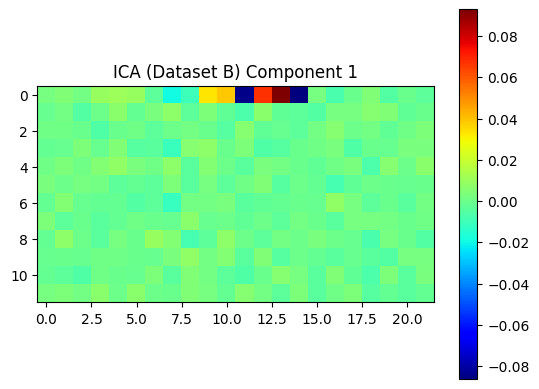

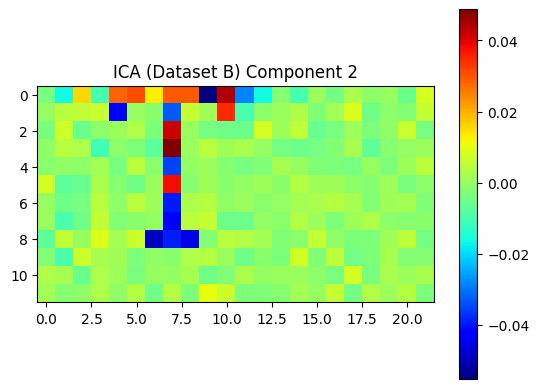

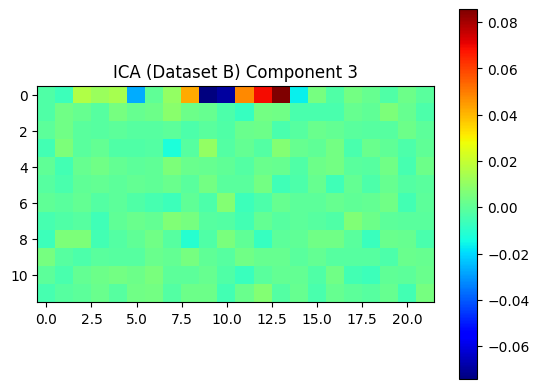

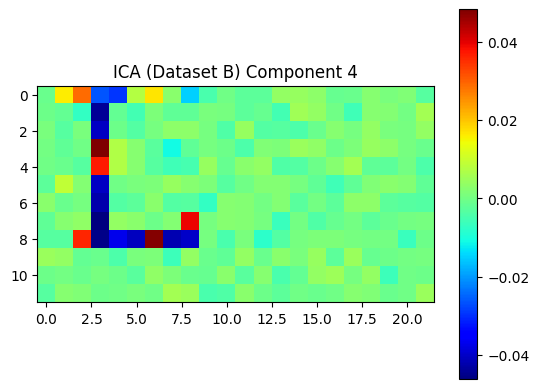

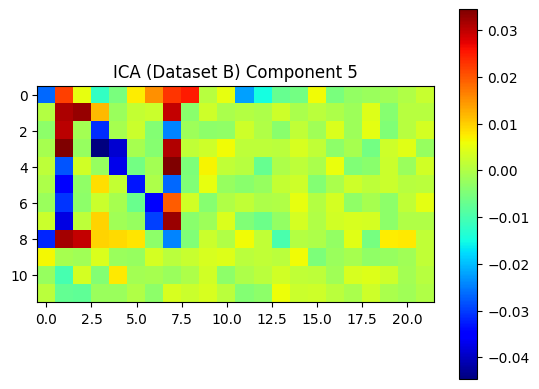

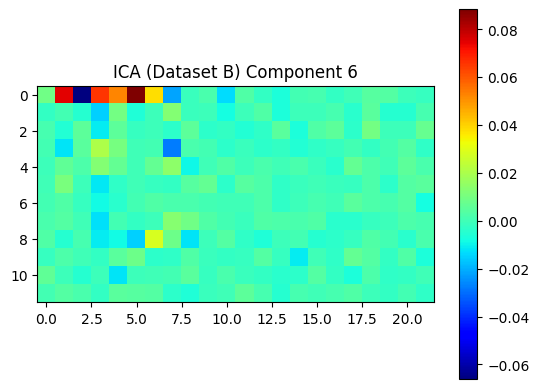

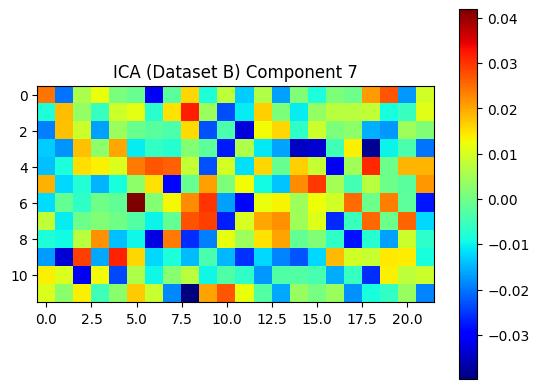

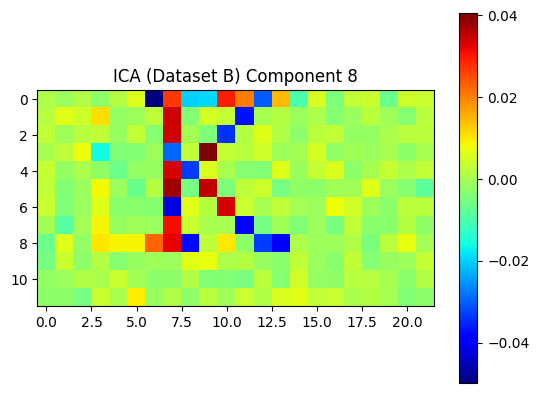

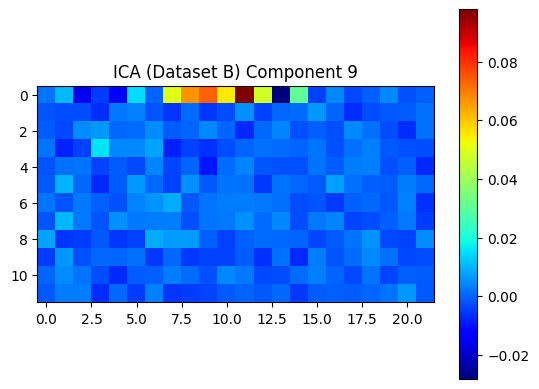

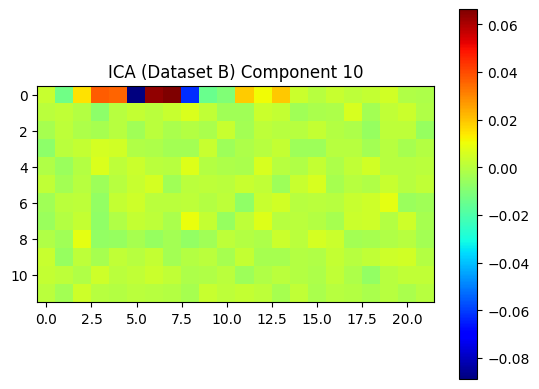

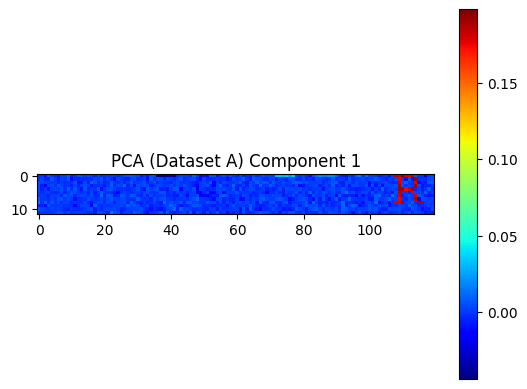

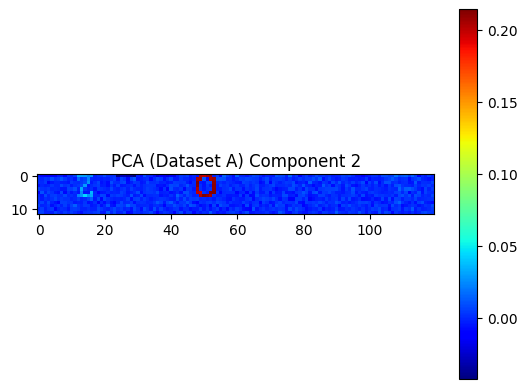

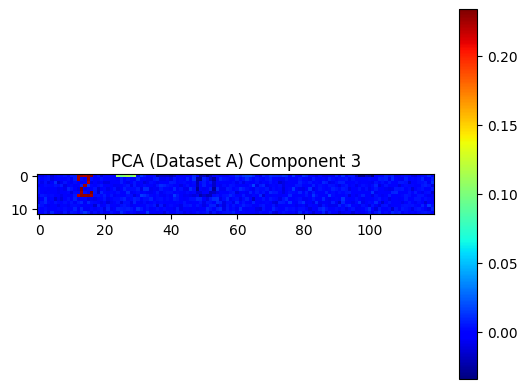

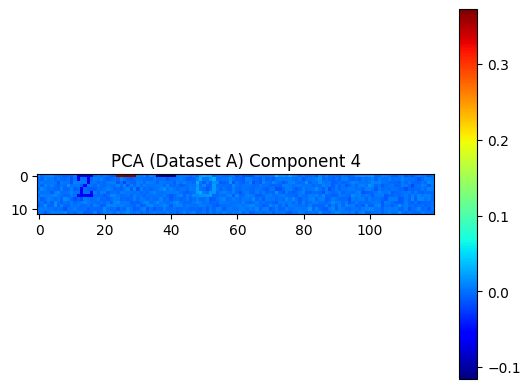

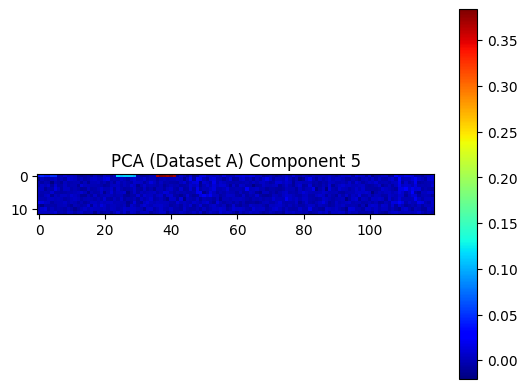

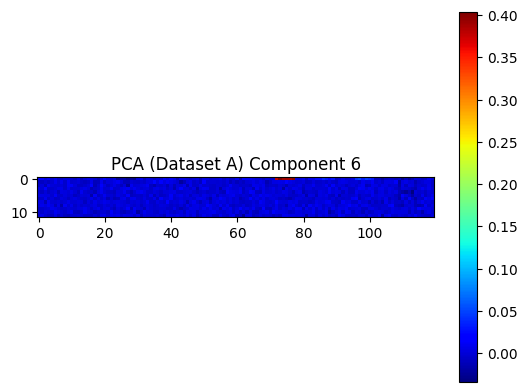

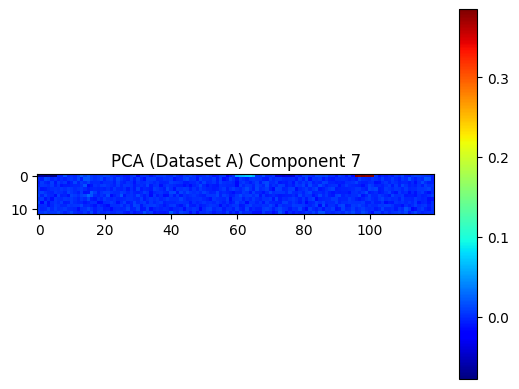

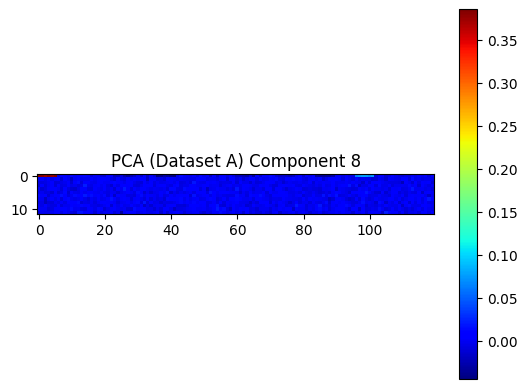

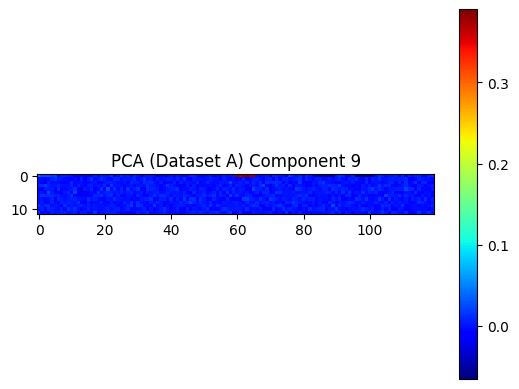

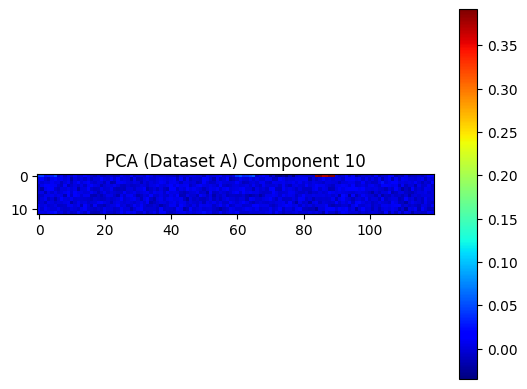

In [2]:
data_ICA = apply_ica(new_arrayB)  
data_PCA = apply_pca(new_arrayA)  

# Visualize ICA and PCA components
visualize_components(data_ICA.components_, (image_height_B, image_width_B), "ICA (Dataset B)")
visualize_components(data_PCA.components_, (image_height_A, image_width_A), "PCA (Dataset A)")


### **ICA Answer: "L", "K", "N", "T"**
- ICA was applied to `new_arrayB`, and after analysis, it revealed **the Python library "NLTK" (Natural Language Toolkit)** as a meaningful structure.    

### **PCA Answer: "R", "O", "Z"**
- PCA was applied to `new_arrayA`, and after analysis, it revealed **Roz, the robot from *The Wild Robot* book** as a meaningful structure.  



## Since i did not get my answer that why each dataset works better with one method, I am continueing my investigation with steps below:

## 1- Visualization of some raw images

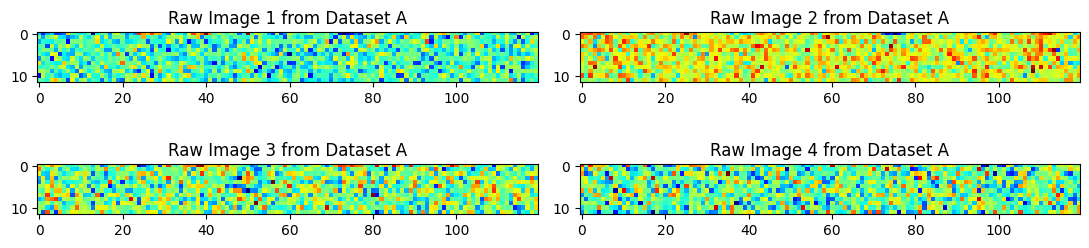

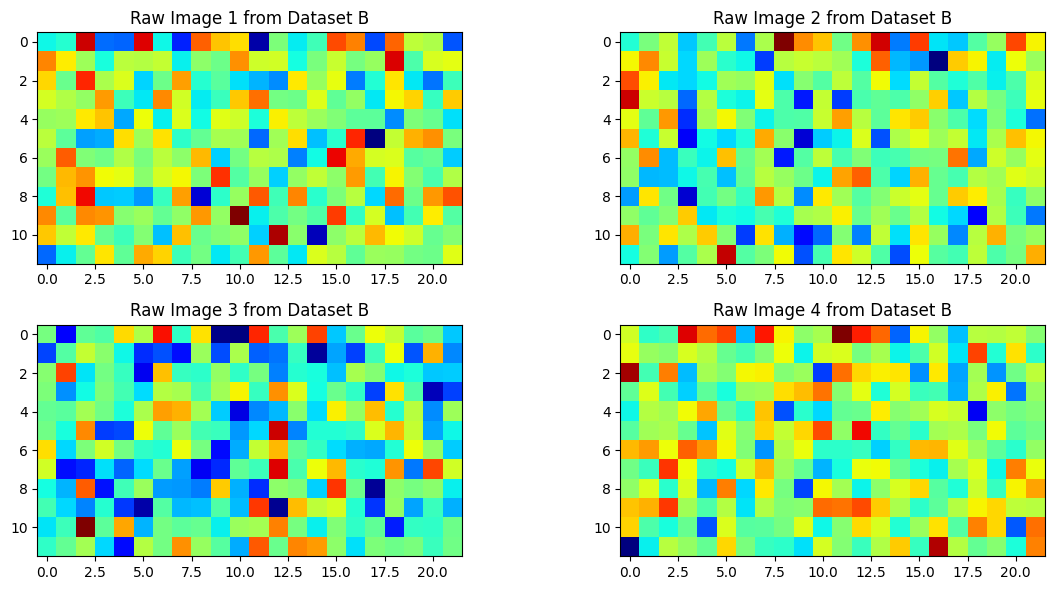

In [3]:
# Plot a few raw images from Dataset A
plt.figure(figsize=(11, 3))
for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.imshow(ImagesTableA[i][1], cmap=cm.jet)
    plt.title(f"Raw Image {i+1} from Dataset A")
plt.tight_layout()
plt.show()    

# Plot a few raw images from Dataset B
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(ImagesTableB[i][1], cmap=cm.jet)
    plt.title(f"Raw Image {i+1} from Dataset B")
plt.tight_layout()
plt.show()

### DatasetA:
- In DatasetA, transitions among different colors seems to be more gradual, indicating that neighboring pixels have similar intensity values.
- By looking at two first images of DatasetA , I have noticed that the main colors in them are blue and orange respectively, showing a more continuous distribution of pixel intensities. 
- This smoother variation suggests a higher correlation between adjacent pixels, which is why PCA works well for this dataset, since it is designed to capture and remove correlations in data.

### DatasetB:
- Some neighboring pixels may share similar values, but overall, the structure does not follow a global correlation.
- In this dataset, I can see more randome distribution, and different areas in the image have different intensity patterns rather than smooth transitions.
- The presence of independent structures suggests that different parts of the image may originate from different underlying sources, which is why ICA works better for this dataset, since it is designed to separate independent sources that are mixed into a dataset.

## 2- Pixel Intensity Distribution

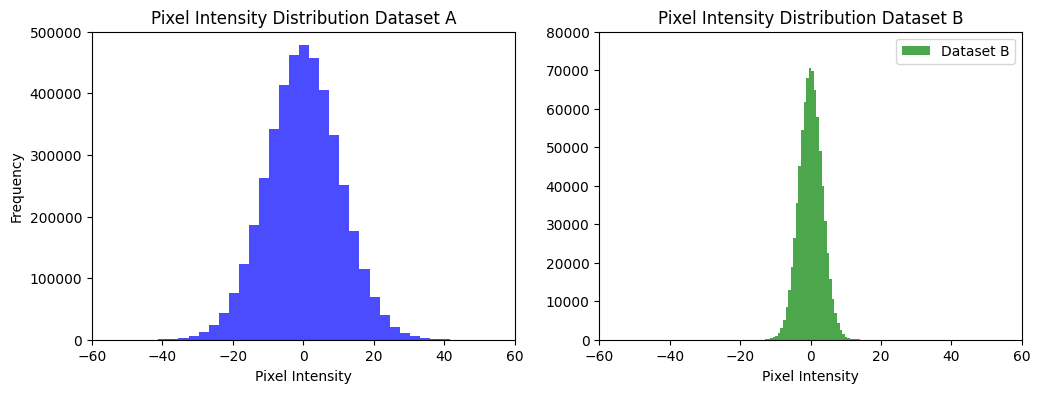

In [5]:
# Plot histogram of pixel values for the first dataset
pixel_values_A = new_arrayA.flatten()
pixel_values_B = new_arrayB.flatten()

# Plot histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(pixel_values_A, bins=50, alpha=0.7, label='Dataset A', color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution Dataset A')
plt.xlim(-60,60)
plt.ylim(0,500000)
plt.subplot(1,2,2)
plt.hist(pixel_values_B, bins=50, alpha=0.7, label='Dataset B', color='green')
plt.xlabel('Pixel Intensity')
plt.title('Pixel Intensity Distribution Dataset B')
plt.xlim(-60,60)
plt.ylim(0,80000)
plt.legend()
plt.show()

### - **In the first dataset** 
The pixel intensities seems to be normally distributed (bell shape), and the distribution is wider, meaning that the dataset has more diverse pixel intensities and stronger variations across different pixels. Since PCA is variance-based, it works well here, and can efficiently reduce dimensions while retaining the most important information.

### - **In the second dataset**
The pixel intensity distribution is much narrower,appearing non-Gaussian. The pixels are very close in intensity, meaning less variance in the data, but instead haveing hidden independent components. Since ICA does not rely on variance but instead maximizes statistical independence, it is better suited for DatasetB.

## 3- Kurtosis (Non-Gaussianity)

In [6]:
from scipy.stats import kurtosis

# Compute kurtosis for both datasets
kurtosis_A = kurtosis(new_arrayA.flatten(), fisher=True)
kurtosis_B = kurtosis(new_arrayB.flatten(), fisher=True)

print(f"Kurtosis for Dataset A: {kurtosis_A}")
print(f"Kurtosis for Dataset B: {kurtosis_B}")


Kurtosis for Dataset A: 0.17128428168762788
Kurtosis for Dataset B: 0.16881561169208448


- Based on my investigation kurtosis can measure how much a distribution deviates from a normal (Gaussian) distribution, and ICA prefers high kurtosis (sharp peaks and more outliers in tails), meaning the data is non-Gaussian. While, Both datasets have low kurtosis, meaning they are approximately Gaussian in distribution. ICA is most effective for non-Gaussian data but for this case it is not easy to capture the method simply.

## 4- Covariance Matrix Computation

In [8]:
# Compute Covariance Matrices
cov_matrix_A = np.cov(new_arrayA, rowvar=False)
cov_matrix_B = np.cov(new_arrayB, rowvar=False)

# Decide between PCA and ICA
if np.mean(np.abs(cov_matrix_A)) > np.mean(np.abs(cov_matrix_B)):
    print("Dataset A has higher feature correlation → Suitable for PCA")
else:
    print("Dataset A has lower feature correlation → Less suitable for PCA")

Dataset A has higher feature correlation → Suitable for PCA


- Covariance measures the relationship between different features in a dataset.
- High covariance indicates strong linear correlations among features, making PCA a better choice because PCA removes correlations while retaining the most important variance.
- Low covariance means features are more independent, which suggests that ICA might be more effective, since ICA finds statistically independent components rather than just decorrelating data.